In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
from keras import backend as K
import keras.layers as layers
from keras.models import Model
from keras import Sequential
from keras.layers import Lambda, Dense, Flatten
from sklearn.metrics import roc_curve, roc_auc_score
from keras.losses import binary_crossentropy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
'''
N = 2000000
rho = 0.8

Z0 = np.random.normal(0.,1.5,N)
Z1 = np.random.normal(0.,1.5,N)
Z2 = np.random.normal(0.,1.5,N)
X0 = Z1*rho + Z0*(1.-rho**2)**0.5
X1 = Z1
X2 = Z2

background_x = np.array(tuple(zip(X0, X1, X2)))
background_y = np.zeros(len(background_x))

Z0 = np.random.normal(2.5,1.5,N)
Z1 = np.random.normal(2.5,1.5,N)
Z2 = np.random.normal(2,1.5,N)
signal_x = np.array(tuple(zip(Z0, Z1, Z2)))
signal_y = np.ones(len(signal_x))

X = np.concatenate([background_x,signal_x])
Y = np.concatenate([background_y,signal_y])

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15)
'''

'\nN = 2000000\nrho = 0.8\n\nZ0 = np.random.normal(0.,1.5,N)\nZ1 = np.random.normal(0.,1.5,N)\nZ2 = np.random.normal(0.,1.5,N)\nX0 = Z1*rho + Z0*(1.-rho**2)**0.5\nX1 = Z1\nX2 = Z2\n\nbackground_x = np.array(tuple(zip(X0, X1, X2)))\nbackground_y = np.zeros(len(background_x))\n\nZ0 = np.random.normal(2.5,1.5,N)\nZ1 = np.random.normal(2.5,1.5,N)\nZ2 = np.random.normal(2,1.5,N)\nsignal_x = np.array(tuple(zip(Z0, Z1, Z2)))\nsignal_y = np.ones(len(signal_x))\n\nX = np.concatenate([background_x,signal_x])\nY = np.concatenate([background_y,signal_y])\n\nX_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15)\n'

In [4]:
X_train = np.load("DD/X_train.npy")
Y_train = np.load("DD/Y_train.npy")
X_val = np.load("DD/X_val.npy")
Y_val = np.load("DD/Y_val.npy")

preds_DD = np.load("DD/preds_DDs_200.npy")
fpr_DD0, tpr_DD0, _ = roc_curve(Y_val, preds_DD[:,0])
fpr_DD1, tpr_DD1, _ = roc_curve(Y_val, preds_DD[:,1])

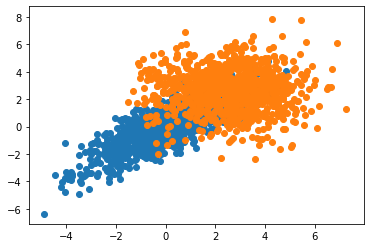

In [5]:
plt.scatter(X_val[Y_val==0][:,0][0:1000],X_val[Y_val==0][:,1][0:1000])
plt.scatter(X_val[Y_val==1][:,0][0:1000],X_val[Y_val==1][:,1][0:1000])

In [6]:
'''
model_baseline = Sequential()
model_baseline.add(Dense(128, activation='relu',input_shape =(2,))) 
model_baseline.add(Dense(128, activation='relu'))
model_baseline.add(Dense(128, activation='relu'))
model_baseline.add(Dense(1, activation='sigmoid'))
model_baseline.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
hist_model_baseline = model_baseline.fit(X_train[:,1:3], Y_train, epochs=20, batch_size=int(0.01*len(X_train)),validation_data=(X_val[:,1:3], Y_val))
'''

'\nmodel_baseline = Sequential()\nmodel_baseline.add(Dense(128, activation=\'relu\',input_shape =(2,))) \nmodel_baseline.add(Dense(128, activation=\'relu\'))\nmodel_baseline.add(Dense(128, activation=\'relu\'))\nmodel_baseline.add(Dense(1, activation=\'sigmoid\'))\nmodel_baseline.compile(loss="binary_crossentropy", optimizer=\'adam\', metrics=[\'accuracy\'])\nhist_model_baseline = model_baseline.fit(X_train[:,1:3], Y_train, epochs=20, batch_size=int(0.01*len(X_train)),validation_data=(X_val[:,1:3], Y_val))\n'

In [7]:
#plt.plot(hist_model_baseline.history['loss'])
#plt.plot(hist_model_baseline.history['val_loss'])

In [8]:
json_file = open('DD/model_baseline.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_baseline = model_from_json(loaded_model_json)
model_baseline.load_weights("DD/model_baseline.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
#preds_baseline = model_baseline.predict(X_val[:,1:3],batch_size=int(0.01*len(X_train)))

In [10]:
preds_baseline = np.load("DD/preds_baseline.npy")

In [11]:
'''
model_all = Sequential()
model_all.add(Dense(128, activation='relu',input_shape =(3,))) 
model_all.add(Dense(128, activation='relu'))
model_all.add(Dense(128, activation='relu'))
model_all.add(Dense(1, activation='sigmoid'))
model_all.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
hist_model_all = model_all.fit(X_train, Y_train, epochs=10, batch_size=int(0.01*len(X_train)),validation_data=(X_val, Y_val))
'''

'\nmodel_all = Sequential()\nmodel_all.add(Dense(128, activation=\'relu\',input_shape =(3,))) \nmodel_all.add(Dense(128, activation=\'relu\'))\nmodel_all.add(Dense(128, activation=\'relu\'))\nmodel_all.add(Dense(1, activation=\'sigmoid\'))\nmodel_all.compile(loss="binary_crossentropy", optimizer=\'adam\', metrics=[\'accuracy\'])\nhist_model_all = model_all.fit(X_train, Y_train, epochs=10, batch_size=int(0.01*len(X_train)),validation_data=(X_val, Y_val))\n'

In [12]:
json_file = open('DD/model_all.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_all = model_from_json(loaded_model_json)
model_all.load_weights("DD/model_all.h5")

In [13]:
#preds_A = model_all.predict(X_val)

In [14]:
preds_A = np.load("DD/preds_A.npy")

In [15]:
fpr_A, tpr_A, _ = roc_curve(Y_val, preds_A)

In [16]:
'''
model_M = Sequential()
model_M.add(Dense(128, activation='relu',input_shape =(1,))) 
model_M.add(Dense(128, activation='relu'))
model_M.add(Dense(128, activation='relu'))
model_M.add(Dense(1, activation='sigmoid'))
model_M.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
hist_model_M = model_M.fit(X_train[:,0], Y_train, epochs=10, batch_size=int(0.01*len(X_train)),validation_data=(X_val[:,0], Y_val))
'''

'\nmodel_M = Sequential()\nmodel_M.add(Dense(128, activation=\'relu\',input_shape =(1,))) \nmodel_M.add(Dense(128, activation=\'relu\'))\nmodel_M.add(Dense(128, activation=\'relu\'))\nmodel_M.add(Dense(1, activation=\'sigmoid\'))\nmodel_M.compile(loss="binary_crossentropy", optimizer=\'adam\', metrics=[\'accuracy\'])\nhist_model_M = model_M.fit(X_train[:,0], Y_train, epochs=10, batch_size=int(0.01*len(X_train)),validation_data=(X_val[:,0], Y_val))\n'

In [17]:
json_file = open('DD/model_M.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_M = model_from_json(loaded_model_json)
model_M.load_weights("DD/model_M.h5")

In [18]:
#preds_M = model_M.predict(X_val[:,0])

In [19]:
preds_M = np.load("DD/preds_M.npy")

In [20]:
fpr_M, tpr_M, _ = roc_curve(Y_val, preds_M)

In [21]:
def DisCo_np(X,Y):
    ajk = np.abs(np.reshape(np.repeat(X,len(X)),[len(X),len(X)]) - np.transpose(X))
    bjk = np.abs(np.reshape(np.repeat(Y,len(Y)),[len(Y),len(Y)]) - np.transpose(Y))

    Ajk = ajk - np.mean(ajk,axis=0)[None, :] - np.mean(ajk,axis=1)[:, None] + np.mean(ajk)
    Bjk = bjk - np.mean(bjk,axis=0)[None, :] - np.mean(bjk,axis=1)[:, None] + np.mean(bjk)

    dcor = np.sum(Ajk*Bjk) / np.sqrt(np.sum(Ajk*Ajk)*np.sum(Bjk*Bjk))
    return dcor

In [22]:
def DisCo(y_true, y_pred, x_in, alpha = 0.):
    #alpha determines the amount of decorrelation; 0 means no decorrelation.
    #Note that the decorrelating feature is also used for learning.
    
    X_in = tf.gather(x_in, [0], axis=1) #decorrelate with the first element of the input
    Y_in = y_pred

    #Only require decorrelation for the background.
    mymaskX = tf.where(y_true[:,0]<1,K.ones_like(X_in),K.zeros_like(X_in))
    mymaskY = tf.where(y_true[:,0]<1,K.ones_like(Y_in),K.zeros_like(Y_in))
    X = tf.boolean_mask(X_in, mymaskX)
    Y = tf.boolean_mask(Y_in, mymaskY)
    
    LX = K.shape(X)[0]
    LY = K.shape(Y)[0]
    
    X=K.reshape(X,shape=(LX,1))
    Y=K.reshape(Y,shape=(LY,1))    
    
    ajk = K.abs(K.reshape(K.repeat(X,LX),shape=(LX,LX)) - K.transpose(X))
    bjk = K.abs(K.reshape(K.repeat(Y,LY),shape=(LY,LY)) - K.transpose(Y))

    Ajk = ajk - K.mean(ajk,axis=0)[None, :] - K.mean(ajk,axis=1)[:, None] + K.mean(ajk)
    Bjk = bjk - K.mean(bjk,axis=0)[None, :] - K.mean(bjk,axis=1)[:, None] + K.mean(bjk)

    dcor = K.sum(Ajk*Bjk) / K.sqrt(K.sum(Ajk*Ajk)*K.sum(Bjk*Bjk))    
    
    return binary_crossentropy(y_true,y_pred) + alpha*dcor

In [23]:
def redacted_set(x):
    #Returns everything except the last element.  This is the decorrelation target ("Mass")
    return x[:,1:3]

In [24]:
'''
model_DisCo = Sequential()
model_DisCo.add(Lambda(redacted_set,input_shape =(3,)))
model_DisCo.add(Dense(128, activation='relu')) 
model_DisCo.add(Dense(128, activation='relu'))
model_DisCo.add(Dense(128, activation='relu'))
model_DisCo.add(Dense(1, activation='sigmoid'))
model_DisCo.compile(loss=lambda y_true, y_pred: DisCo(y_true, y_pred, model_DisCo.input, alpha = 1000), optimizer='adam', metrics=['accuracy'])
hist_model_DisCo = model_DisCo.fit(X_train, Y_train, epochs=100, batch_size=int(0.01*len(X_train)),validation_data=(X_val, Y_val))
'''

"\nmodel_DisCo = Sequential()\nmodel_DisCo.add(Lambda(redacted_set,input_shape =(3,)))\nmodel_DisCo.add(Dense(128, activation='relu')) \nmodel_DisCo.add(Dense(128, activation='relu'))\nmodel_DisCo.add(Dense(128, activation='relu'))\nmodel_DisCo.add(Dense(1, activation='sigmoid'))\nmodel_DisCo.compile(loss=lambda y_true, y_pred: DisCo(y_true, y_pred, model_DisCo.input, alpha = 1000), optimizer='adam', metrics=['accuracy'])\nhist_model_DisCo = model_DisCo.fit(X_train, Y_train, epochs=100, batch_size=int(0.01*len(X_train)),validation_data=(X_val, Y_val))\n"

In [25]:
#plt.plot(hist_model_DisCo.history['val_loss'][1:-1])
#plt.plot(hist_model_DisCo.history['loss'][1:-1])

In [26]:
json_file = open('DD/model_DisCo.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_DisCo = model_from_json(loaded_model_json)
model_DisCo.load_weights("DD/model_DisCo.h5")

In [27]:
#preds_DisCo = model_DisCo.predict(X_val,batch_size=int(0.01*len(X_train)))

In [28]:
preds_DisCo = np.load("DD/preds_DisCo.npy")

In [29]:
fpr_D, tpr_D, _ = roc_curve(Y_val, preds_DisCo[:,0])

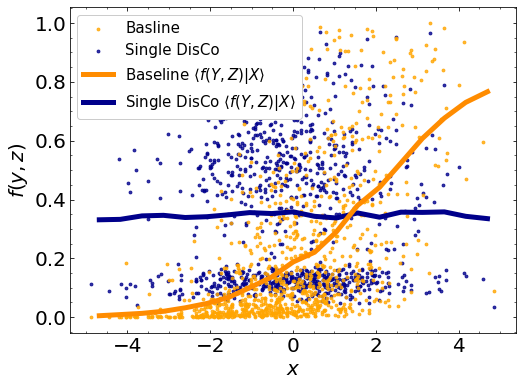

In [30]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.scatter(X_val[Y_val==0][:,0][0:1000],preds_DisCo[Y_val==0][0:1000],label="Single DisCo",color='darkblue',s=8,alpha=0.8)
plt.scatter(X_val[Y_val==0][:,0][0:1000],preds_baseline[Y_val==0][0:1000],label="Basline",color="orange",s=8,alpha=0.8)

mybins = np.linspace(-5,5,20)
xx_SD=[]
yy_SD=[]
yy_Base=[]
for i in range(20-1):
    xx_SD +=[np.mean(X_val[Y_val==0][:,0][(X_val[Y_val==0][:,0] > mybins[i])*(X_val[Y_val==0][:,0] < mybins[i+1])][0:1000])]
    yy_SD +=[np.mean(preds_DisCo[Y_val==0][:,0][(X_val[Y_val==0][:,0] > mybins[i])*(X_val[Y_val==0][:,0] < mybins[i+1])][0:1000])]
    yy_Base +=[np.mean(preds_baseline[Y_val==0][:,0][(X_val[Y_val==0][:,0] > mybins[i])*(X_val[Y_val==0][:,0] < mybins[i+1])][0:1000])]
    pass
plt.plot(xx_SD,yy_SD,linewidth=5,color="darkblue",label=r"Single DisCo $\langle f(Y,Z)|X\rangle$")
plt.plot(xx_SD,yy_Base,linewidth=5,color='darkorange',label=r"Baseline $\langle f(Y,Z)|X\rangle$")

plt.xlabel("$x$",fontsize=20)
plt.ylabel("$f(y,z)$",fontsize=20)
handles, labels = ax0.get_legend_handles_labels()
ax0.legend([handles[3],handles[2],handles[1],handles[0]], [labels[3],labels[2],labels[1],labels[0]],frameon=True,framealpha=1,fontsize=15,loc="upper left")
plt.savefig("ToyNN_versus_X_singleDisCo.pdf",bbox_inches='tight')

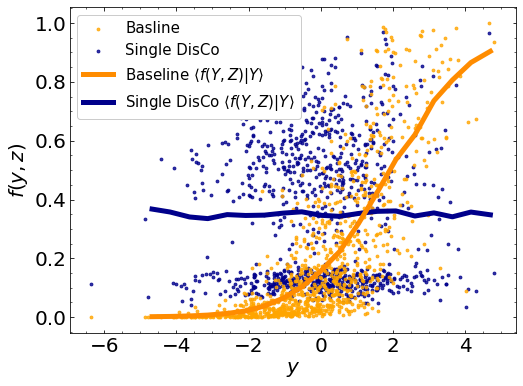

In [31]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.scatter(X_val[Y_val==0][:,1][0:1000],preds_DisCo[Y_val==0][0:1000],label="Single DisCo",color='darkblue',s=8,alpha=0.8)
plt.scatter(X_val[Y_val==0][:,1][0:1000],preds_baseline[Y_val==0][0:1000],label="Basline",color="orange",s=8,alpha=0.8)

mybins = np.linspace(-5,5,20)
xx_SD=[]
yy_SD=[]
yy_Base=[]
for i in range(20-1):
    xx_SD +=[np.mean(X_val[Y_val==0][:,1][(X_val[Y_val==0][:,1] > mybins[i])*(X_val[Y_val==0][:,1] < mybins[i+1])][0:1000])]
    yy_SD +=[np.mean(preds_DisCo[Y_val==0][:,0][(X_val[Y_val==0][:,1] > mybins[i])*(X_val[Y_val==0][:,1] < mybins[i+1])][0:1000])]
    yy_Base +=[np.mean(preds_baseline[Y_val==0][:,0][(X_val[Y_val==0][:,1] > mybins[i])*(X_val[Y_val==0][:,1] < mybins[i+1])][0:1000])]
    pass
plt.plot(xx_SD,yy_SD,linewidth=5,color="darkblue",label=r"Single DisCo $\langle f(Y,Z)|Y\rangle$")
plt.plot(xx_SD,yy_Base,linewidth=5,color='darkorange',label=r"Baseline $\langle f(Y,Z)|Y\rangle$")

plt.xlabel("$y$",fontsize=20)
plt.ylabel("$f(y,z)$",fontsize=20)
handles, labels = ax0.get_legend_handles_labels()
ax0.legend([handles[3],handles[2],handles[1],handles[0]], [labels[3],labels[2],labels[1],labels[0]],frameon=True,framealpha=1,fontsize=15,loc="upper left")
plt.savefig("ToyNN_versus_Y_singleDisCo.pdf",bbox_inches='tight')

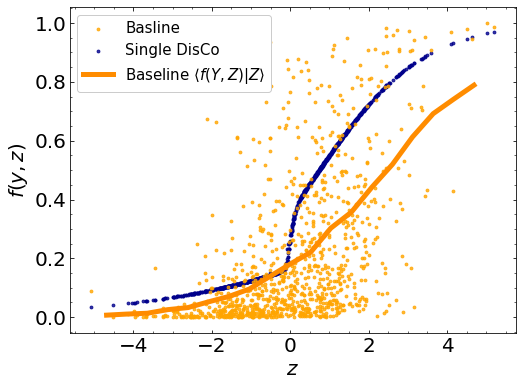

In [32]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.scatter(X_val[Y_val==0][:,2][0:1000],preds_DisCo[Y_val==0][0:1000],label="Single DisCo",color='darkblue',s=8,alpha=0.8)
plt.scatter(X_val[Y_val==0][:,2][0:1000],preds_baseline[Y_val==0][0:1000],label="Basline",color="orange",s=8,alpha=0.8)

mybins = np.linspace(-5,5,20)
xx_SD=[]
yy_SD=[]
yy_Base=[]
for i in range(20-1):
    xx_SD +=[np.mean(X_val[Y_val==0][:,2][(X_val[Y_val==0][:,2] > mybins[i])*(X_val[Y_val==0][:,2] < mybins[i+1])][0:1000])]
    yy_SD +=[np.mean(preds_DisCo[Y_val==0][:,0][(X_val[Y_val==0][:,2] > mybins[i])*(X_val[Y_val==0][:,2] < mybins[i+1])][0:1000])]
    yy_Base +=[np.mean(preds_baseline[Y_val==0][:,0][(X_val[Y_val==0][:,2] > mybins[i])*(X_val[Y_val==0][:,2] < mybins[i+1])][0:1000])]
    pass
#plt.plot(xx_SD,yy_SD,linewidth=5,color="darkblue",label=r"Single DisCo $\langle f(Y,Z)|Z\rangle$")
plt.plot(xx_SD,yy_Base,linewidth=5,color='darkorange',label=r"Baseline $\langle f(Y,Z)|Z\rangle$")

plt.xlabel("$z$",fontsize=20)
plt.ylabel("$f(y,z)$",fontsize=20)
handles, labels = ax0.get_legend_handles_labels()
ax0.legend([handles[2],handles[1],handles[0]], [labels[2],labels[1],labels[0]],frameon=True,framealpha=1,fontsize=15,loc="upper left")
plt.savefig("ToyNN_versus_Z_singleDisCo.pdf",bbox_inches='tight')

In [33]:
DisCo_np(X_val[Y_val==0][:,0][0:1000],preds_DisCo[Y_val==0][0:1000])

0.010001879046126596

In [34]:
def DoubleDisCo(y_true, y_pred, alpha = 0.):
    #alpha determines the amount of decorrelation; 0 means no decorrelation.
    
    X_in = y_pred[:,0]
    Y_in = y_pred[:,1]

    #Only require decorrelation for the background.
    mymaskX = tf.where(y_true[:,0]<1,K.ones_like(X_in),K.zeros_like(X_in))
    mymaskY = tf.where(y_true[:,0]<1,K.ones_like(Y_in),K.zeros_like(Y_in))
    X = tf.boolean_mask(X_in, mymaskX)
    Y = tf.boolean_mask(Y_in, mymaskY)
    
    LX = K.shape(X)[0]
    LY = K.shape(Y)[0]
    
    X=K.reshape(X,shape=(LX,1))
    Y=K.reshape(Y,shape=(LY,1))    
    
    ajk = K.abs(K.reshape(K.repeat(X,LX),shape=(LX,LX)) - K.transpose(X))
    bjk = K.abs(K.reshape(K.repeat(Y,LY),shape=(LY,LY)) - K.transpose(Y))

    Ajk = ajk - K.mean(ajk,axis=0)[None, :] - K.mean(ajk,axis=1)[:, None] + K.mean(ajk)
    Bjk = bjk - K.mean(bjk,axis=0)[None, :] - K.mean(bjk,axis=1)[:, None] + K.mean(bjk)

    dcor = K.sum(Ajk*Bjk) / K.sqrt(K.sum(Ajk*Ajk)*K.sum(Bjk*Bjk))    
    
    return binary_crossentropy(y_true[:,0],y_pred[:,0]) + binary_crossentropy(y_true[:,0],y_pred[:,1]) + alpha*dcor

In [35]:
'''
model_DoubleDisCo = Sequential()
model_DoubleDisCo.add(Dense(128, activation='relu',input_shape =(3,))) 
model_DoubleDisCo.add(Dense(128, activation='relu')) 
#model_DoubleDisCo.add(layers.Dropout(0.25))
model_DoubleDisCo.add(Dense(128, activation='relu'))
#model_DoubleDisCo.add(layers.Dropout(0.25))
model_DoubleDisCo.add(Dense(2, activation='sigmoid'))
model_DoubleDisCo.compile(loss=lambda y_true, y_pred: DoubleDisCo(y_true, y_pred, alpha = 1000.), optimizer='adam', metrics=['accuracy'])
'''

"\nmodel_DoubleDisCo = Sequential()\nmodel_DoubleDisCo.add(Dense(128, activation='relu',input_shape =(3,))) \nmodel_DoubleDisCo.add(Dense(128, activation='relu')) \n#model_DoubleDisCo.add(layers.Dropout(0.25))\nmodel_DoubleDisCo.add(Dense(128, activation='relu'))\n#model_DoubleDisCo.add(layers.Dropout(0.25))\nmodel_DoubleDisCo.add(Dense(2, activation='sigmoid'))\nmodel_DoubleDisCo.compile(loss=lambda y_true, y_pred: DoubleDisCo(y_true, y_pred, alpha = 1000.), optimizer='adam', metrics=['accuracy'])\n"

In [36]:
#checkpoint = ModelCheckpoint("/data0/bpnachman/weights/saved-model-{epoch:02d}.hdf5", save_best_only=False, mode='auto', period=1,save_weights_only=True)
#hist_model_DoubleDisCo = model_DoubleDisCo.fit(X_train, Y_train, epochs=200, batch_size=int(0.01*len(X_train)),validation_data=(X_val, Y_val), callbacks=[checkpoint])

In [37]:
#plt.plot(hist_model_DoubleDisCo.history['val_loss'][1:-1])
#plt.plot(hist_model_DoubleDisCo.history['loss'][1:-1])

In [38]:
json_file = open('DD/model_DoubleDisCo.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_DoubleDisCo = model_from_json(loaded_model_json)
model_DoubleDisCo.load_weights("DD/model_DoubleDisCo.h5")

In [39]:
#preds_DD = model_DoubleDisCo.predict(X_val,batch_size=int(0.01*len(X_train)))

In [40]:
preds_DD = np.load("DD/preds_DD.npy")
fpr_DD0, tpr_DD0, _ = roc_curve(Y_val, preds_DD[:,0])
fpr_DD1, tpr_DD1, _ = roc_curve(Y_val, preds_DD[:,1])

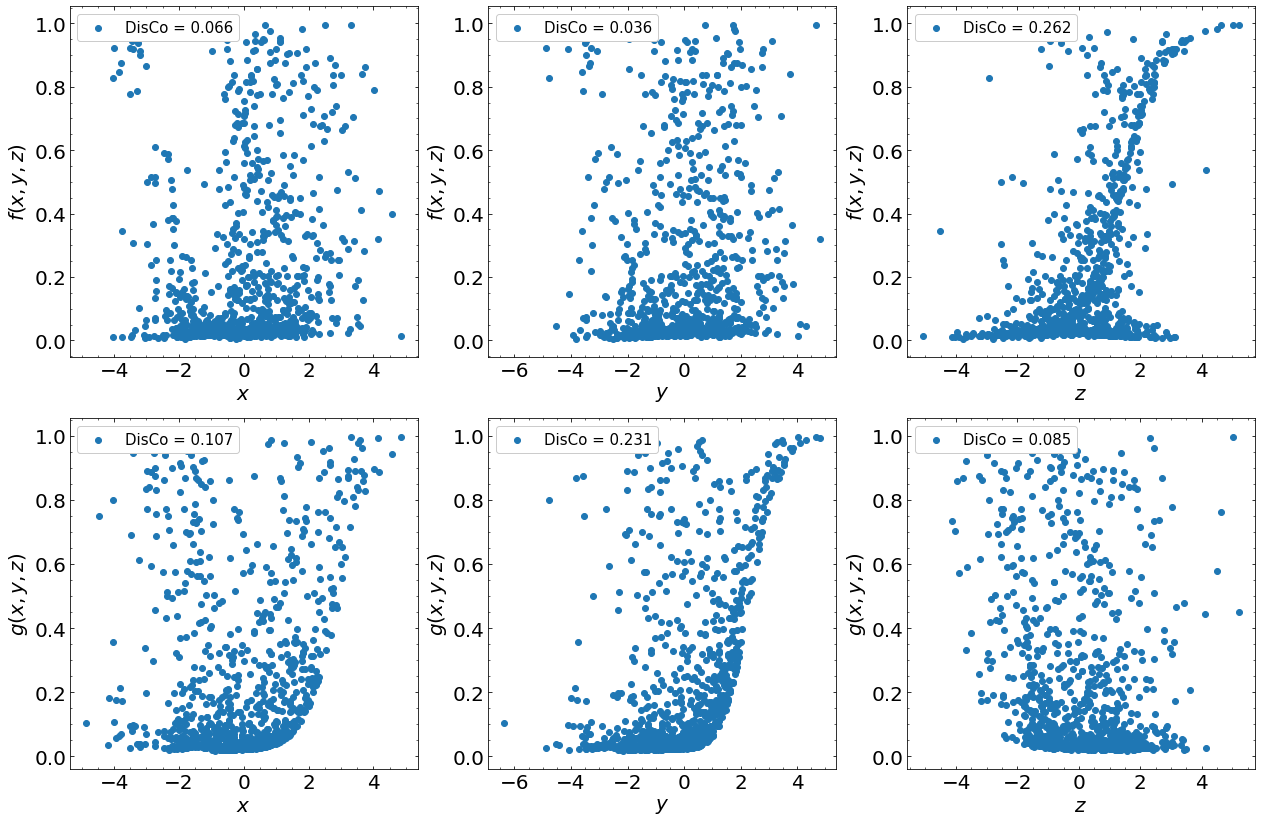

In [41]:
figure, axes = plt.subplots(figsize=(18, 12),nrows=2, ncols=3)
figure.tight_layout(pad=4.0)

ax0 = plt.subplot(231)
plt.scatter(X_val[Y_val==0][:,0][0:1000],preds_DD[Y_val==0][0:1000][:,0],label="DisCo = "+"%0.3f" % DisCo_np(X_val[Y_val==0][:,0][0:1000],preds_DD[Y_val==0][0:1000][:,0]))
plt.xlabel("$x$",fontsize=20)
plt.ylabel("$f(x,y,z)$",fontsize=20)
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.legend(frameon=True,framealpha=1,fontsize=15,loc="upper left")
ax0.minorticks_on()

ax0 = plt.subplot(232)
plt.scatter(X_val[Y_val==0][:,1][0:1000],preds_DD[Y_val==0][0:1000][:,0],label="DisCo = "+"%0.3f" % DisCo_np(X_val[Y_val==0][:,1][0:1000],preds_DD[Y_val==0][0:1000][:,0]))
plt.xlabel("$y$",fontsize=20)
plt.ylabel("$f(x,y,z)$",fontsize=20)
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.legend(frameon=True,framealpha=1,fontsize=15,loc="upper left")
ax0.minorticks_on()

ax0 = plt.subplot(233)
plt.scatter(X_val[Y_val==0][:,2][0:1000],preds_DD[Y_val==0][0:1000][:,0],label="DisCo = "+"%0.3f" % DisCo_np(X_val[Y_val==0][:,2][0:1000],preds_DD[Y_val==0][0:1000][:,0]))
plt.xlabel("$z$",fontsize=20)
plt.ylabel("$f(x,y,z)$",fontsize=20)
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.legend(frameon=True,framealpha=1,fontsize=15,loc="upper left")
ax0.minorticks_on()

ax0 = plt.subplot(234)
plt.scatter(X_val[Y_val==0][:,0][0:1000],preds_DD[Y_val==0][0:1000][:,1],label="DisCo = "+"%0.3f" % DisCo_np(X_val[Y_val==0][:,0][0:1000],preds_DD[Y_val==0][0:1000][:,1]))
plt.xlabel("$x$",fontsize=20)
plt.ylabel("$g(x,y,z)$",fontsize=20)
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.legend(frameon=True,framealpha=1,fontsize=15,loc="upper left")
ax0.minorticks_on()

ax0 = plt.subplot(235)
plt.scatter(X_val[Y_val==0][:,1][0:1000],preds_DD[Y_val==0][0:1000][:,1],label="DisCo = "+"%0.3f" % DisCo_np(X_val[Y_val==0][:,1][0:1000],preds_DD[Y_val==0][0:1000][:,1]))
plt.xlabel("$y$",fontsize=20)
plt.ylabel("$g(x,y,z)$",fontsize=20)
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.legend(frameon=True,framealpha=1,fontsize=15,loc="upper left")
ax0.minorticks_on()

ax0 = plt.subplot(236)
plt.scatter(X_val[Y_val==0][:,2][0:1000],preds_DD[Y_val==0][0:1000][:,1],label="DisCo = "+"%0.3f" % DisCo_np(X_val[Y_val==0][:,2][0:1000],preds_DD[Y_val==0][0:1000][:,1]))
plt.xlabel("$z$",fontsize=20)
plt.ylabel("$g(x,y,z)$",fontsize=20)
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.legend(frameon=True,framealpha=1,fontsize=15,loc="upper left")
ax0.minorticks_on()

plt.savefig("ToyNN_DDplots.pdf",bbox_inches='tight')

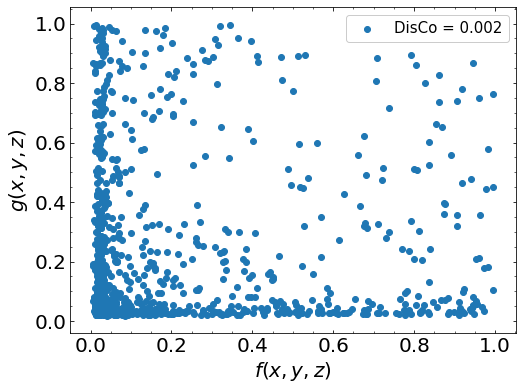

In [42]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.scatter(preds_DD[Y_val==0][0:1000][:,0],preds_DD[Y_val==0][0:1000][:,1],label="DisCo = "+"%0.3f" % DisCo_np(preds_DD[Y_val==0][0:1000][:,0],preds_DD[Y_val==0][0:1000][:,1]))
plt.xlabel("$f(x,y,z)$",fontsize=20)
plt.ylabel("$g(x,y,z)$",fontsize=20)
ax0.legend(frameon=True,framealpha=1,fontsize=15,loc="upper right")
plt.savefig("ToyNN_versus_NN_doubleDisCo.pdf",bbox_inches='tight')

In [43]:
DisCo_np(preds_DD[Y_val==0][:,0][0:10000],preds_DD[Y_val==0][:,1][0:10000])

0.0009658318

In [44]:
sigeffics = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.75,0.8,0.85,0.9,0.95]
myepsilon = 0.001

eps_s = {}
eps_b = {}
closure = {}
contamination = {}

Seps_s = {}
Seps_b = {}
Sclosure = {}
Scontamination = {}

for sigeffic in sigeffics:

    eps_s[sigeffic] = []
    eps_b[sigeffic] = []
    closure[sigeffic] = []
    contamination[sigeffic] = []

    Seps_s[sigeffic] = []
    Seps_b[sigeffic] = []
    Sclosure[sigeffic] = []
    Scontamination[sigeffic] = []

    mycounter = 0
    for myeffics in np.linspace(sigeffic,0.99,100):
        mycounter+=1
        if (mycounter%10==0):
            print(mycounter)
            pass
        cut1 = np.quantile(preds_DD[Y_val==1][:,1],1.-myeffics)
        cut2 = np.quantile(preds_DD[(Y_val==1) & (preds_DD[:,1] > cut1)][:,0],1.-sigeffic/myeffics)
        num = len(preds_DD[(Y_val==1) & (preds_DD[:,1] > cut1) & (preds_DD[:,0] > cut2)])
        den = len(preds_DD[(Y_val==1)])

        numB = len(preds_DD[(Y_val==0) & (preds_DD[:,1] > cut1) & (preds_DD[:,0] > cut2)])
        denB = len(preds_DD[(Y_val==0)])    

        A = myepsilon+len(preds_DD[(Y_val==0) & (preds_DD[:,1] > cut1) & (preds_DD[:,0] < cut2)])
        B = myepsilon+len(preds_DD[(Y_val==0) & (preds_DD[:,1] > cut1) & (preds_DD[:,0] > cut2)])
        C = myepsilon+len(preds_DD[(Y_val==0) & (preds_DD[:,1] < cut1) & (preds_DD[:,0] < cut2)])
        D = myepsilon+len(preds_DD[(Y_val==0) & (preds_DD[:,1] < cut1) & (preds_DD[:,0] > cut2)])

        As = myepsilon+len(preds_DD[(Y_val==1) & (preds_DD[:,1] > cut1) & (preds_DD[:,0] < cut2)])
        Bs = myepsilon+len(preds_DD[(Y_val==1) & (preds_DD[:,1] > cut1) & (preds_DD[:,0] > cut2)])
        Cs = myepsilon+len(preds_DD[(Y_val==1) & (preds_DD[:,1] < cut1) & (preds_DD[:,0] < cut2)])
        Ds = myepsilon+len(preds_DD[(Y_val==1) & (preds_DD[:,1] < cut1) & (preds_DD[:,0] > cut2)])    

        eps_s[sigeffic] += [num/den]
        eps_b[sigeffic] += [numB/denB]
        closure[sigeffic] += [(D*A/C)/B]
        contamination[sigeffic] += [(B/Bs) * ((As/A) + (Ds/D) - (Cs/C))]

        #Single DisCo

        cut1 = np.quantile(preds_DisCo[Y_val==1][:,0],1.-myeffics)
        cut2 = np.quantile(preds_M[(Y_val==1) & (preds_DisCo[:,0] > cut1)][:,0],1.-sigeffic/myeffics)
        num = len(preds_DisCo[(Y_val==1) & (preds_DisCo[:,0] > cut1) & (preds_M[:,0] > cut2)])
        den = len(preds_DisCo[(Y_val==1)])

        numB = len(preds_DisCo[(Y_val==0) & (preds_DisCo[:,0] > cut1) & (preds_M[:,0] > cut2)])
        denB = len(preds_DisCo[(Y_val==0)])    

        A = myepsilon+len(preds_DisCo[(Y_val==0) & (preds_DisCo[:,0] > cut1) & (preds_M[:,0] < cut2)])
        B = myepsilon+len(preds_DisCo[(Y_val==0) & (preds_DisCo[:,0] > cut1) & (preds_M[:,0] > cut2)])
        C = myepsilon+len(preds_DisCo[(Y_val==0) & (preds_DisCo[:,0] < cut1) & (preds_M[:,0] < cut2)])
        D = myepsilon+len(preds_DisCo[(Y_val==0) & (preds_DisCo[:,0] < cut1) & (preds_M[:,0] > cut2)])

        As = myepsilon+len(preds_DisCo[(Y_val==1) & (preds_DisCo[:,0] > cut1) & (preds_M[:,0] < cut2)])
        Bs = myepsilon+len(preds_DisCo[(Y_val==1) & (preds_DisCo[:,0] > cut1) & (preds_M[:,0] > cut2)])
        Cs = myepsilon+len(preds_DisCo[(Y_val==1) & (preds_DisCo[:,0] < cut1) & (preds_M[:,0] < cut2)])
        Ds = myepsilon+len(preds_DisCo[(Y_val==1) & (preds_DisCo[:,0] < cut1) & (preds_M[:,0] > cut2)])    

        Seps_s[sigeffic] += [num/den]
        Seps_b[sigeffic] += [numB/denB]
        Sclosure[sigeffic] += [(D*A/C)/B]
        Scontamination[sigeffic] += [(B/Bs) * ((As/A) + (Ds/D) - (Cs/C))]    

        #print(myeffics,num/den)
    eps_s[sigeffic] = np.array(eps_s[sigeffic])
    eps_b[sigeffic] = np.array(eps_b[sigeffic])
    closure[sigeffic] = np.array(closure[sigeffic])
    contamination[sigeffic] = np.array(contamination[sigeffic])

    Seps_s[sigeffic] = np.array(Seps_s[sigeffic])
    Seps_b[sigeffic] = np.array(Seps_b[sigeffic])
    Sclosure[sigeffic] = np.array(Sclosure[sigeffic])
    Scontamination[sigeffic] = np.array(Scontamination[sigeffic])
    pass

10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100
10
20
30
40
50
60
70
80
90
100


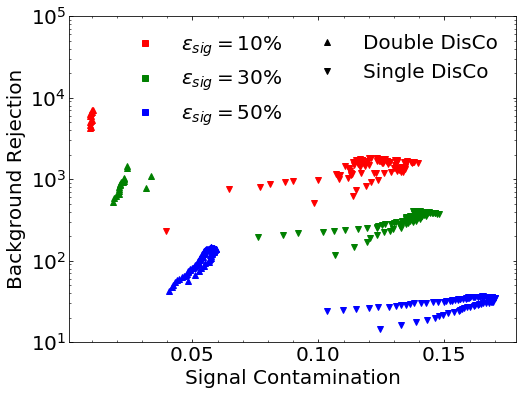

In [45]:
mycolor = {}
mycolor[0.1] = 'red'
mycolor[0.2] = 'green'
mycolor[0.5] = 'blue'

fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

for r in [0.1,0.2,0.5]:
    xx = contamination[r][abs(closure[r]-1.) < 0.2]
    yy = 1./eps_b[r][abs(closure[r]-1.) < 0.2]

    xx2 = Scontamination[r][abs(Sclosure[r]-1.) < 0.2]
    yy2 = 1./Seps_b[r][abs(Sclosure[r]-1.) < 0.2]

    plt.plot(xx,yy,marker='^',ls="none",label=r"Double DisCo, $\epsilon_{sig}=$"+str(r),color=mycolor[r])
    plt.plot(xx2,yy2,marker='v',ls="none",label="Single DisCo, $\epsilon_{sig}=$"+str(r),color=mycolor[r])

plt.xlabel("Signal Contamination",fontsize=20)
plt.ylabel("Background Rejection",fontsize=20)
plt.locator_params(axis='x', nbins=6)
plt.legend(frameon=False,fontsize=12)
plt.yscale("log")
plt.ylim([10,1e5])

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='black', lw=0, marker="^",label=r'Double DisCo'),
                   Line2D([0], [0], color='black', lw=0, marker="v",label=r'Single DisCo')]
l1 = ax0.legend(frameon=False,fontsize=20,handles=legend_elements, loc='upper right')
plt.gca().add_artist(l1)

legend_elements = [Line2D([0], [0], color='red', lw=0, marker="s",label=r'$\epsilon_{sig} = 10\%$'),
                   Line2D([0], [0], color='green', lw=0, marker="s",label=r'$\epsilon_{sig} = 30\%$'),
                   Line2D([0], [0], color='blue', lw=0, marker="s",label=r'$\epsilon_{sig} = 50\%$')]
ax0.legend(frameon=False,fontsize=20,handles=legend_elements, loc='upper center',bbox_to_anchor=(0.3,1))
plt.savefig("ToyNN_signal_contamination.pdf",bbox_inches='tight')

In [46]:
#ROC curve

sigeffics = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.75,0.8,0.85,0.9,0.95]
xx = []
yy = []

xx2 = []
yy2 = []

for r in sigeffics:
    xx_hold = eps_s[r][abs(closure[r]-1.) < 0.1]
    yy_hold = eps_b[r][abs(closure[r]-1.) < 0.1]
    if (len(yy_hold)==0):
        continue
    whichmax = np.argmin(yy_hold)
    xx+=[xx_hold[whichmax]]
    yy+=[yy_hold[whichmax]]
    
    xx_hold = Seps_s[r][abs(Sclosure[r]-1.) < 0.1]
    yy_hold = Seps_b[r][abs(Sclosure[r]-1.) < 0.1]
    if (len(yy_hold)==0):
        continue
    whichmax = np.argmin(yy_hold)
    xx2+=[xx_hold[whichmax]]
    yy2+=[yy_hold[whichmax]]    
    pass
xx = np.array(xx)
yy = np.array(yy)

xx2 = np.array(xx2)
yy2 = np.array(yy2)

/Users/bpnachman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/bpnachman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/bpnachman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/bpnachman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/bpnachman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/bpnachman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/bpnachman/opt/anaconda3/lib/pyth

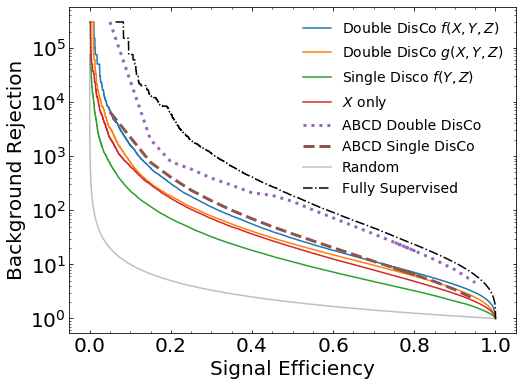

In [47]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(tpr_DD0,1./fpr_DD0,label=r"Double DisCo $f(X,Y,Z)$")
plt.plot(tpr_DD1,1./fpr_DD1,label=r"Double DisCo $g(X,Y,Z)$")
plt.plot(tpr_D,1./fpr_D,label=r"Single Disco $f(Y,Z)$")
plt.plot(tpr_M,1./fpr_M,label="$X$ only")
#plt.scatter(tprs,1./fprs,label="ABCD DD")
#plt.scatter(tprs2,1./fprs2,label="ABCD SD")
plt.plot(xx,1./yy,ls=":",label="ABCD Double DisCo",linewidth=3)
plt.plot(xx2,1./yy2,ls="--",label="ABCD Single DisCo",linewidth=3)
plt.plot(tpr_DD0,1./tpr_DD0,label="Random",color='gray',alpha=0.5)
plt.plot(tpr_A,1./fpr_A,label="Fully Supervised",color='black',ls="-.")
plt.legend(frameon=False,fontsize=14)
plt.yscale("log")
plt.xlabel("Signal Efficiency",fontsize=20)
plt.ylabel("Background Rejection",fontsize=20)
plt.savefig("ToyNN_ROC.pdf",bbox_inches='tight')